In [ ]:
'''
********************************************************* Project 3 *************************************************************
'''

In [ ]:
'''
Problem Statement

This data was extracted from the census bureau database found at
http://www.census.gov/ftp/pub/DES/www/welcome.html
Donor: Ronny Kohavi and Barry Becker,
Data Mining and Visualization
Silicon Graphics.
e-mail: ronnyk@sgi.com for questions.
Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
48842 instances, mix of continuous and discrete (train=32561, test=16281)
45222 if instances with unknown values are removed (train=30162, test=15060)
Duplicate or conflicting instances : 6
Class probabilities for adult.all file
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using
the following conditions:
((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) Prediction task is to determine whether a person makes over 50K a year.
Conversion of original data as follows:

1. Discretized a gross income into two ranges with threshold 50,000.
2. Convert U.S. to US to avoid periods.
3. Convert Unknown to "?"
4. Run MLC++ GenCVFiles to generate data,test.

Description of fnlwgt (final weight)
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.
These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls.
These are:
1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back
to all the controls we used.

The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic
characteristics of the population. People with similar demographic characteristics should have similar weights. There is one
important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state
samples, each with its own probability of selection, the statement only applies within state.

Dataset Link
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
Problem 1:
Prediction task is to determine whether a person makes over 50K a year.
Problem 2:
Which factors are important
Problem 3:
Which algorithms are best for this dataset
'''

In [ ]:
'''
********************************************************* Solution *************************************************************
'''

# Project : Application of classification models

## Overview:
In this project I have used machine learning and analysis techinque to predict income of an individaul. This data was extracted from the census bureau database found at http://www.census.gov/ftp/pub/DES/www/welcome.html donated by Ronny Kohavi and Barry Becker, Data Mining and Visualization

Dataset Link: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

I this project I tried to address three important problems as given below:

    . Problem 1: Prediction task is to determine whether a person makes over 50K a year.

    . Problem 2: Which factors are important for predcition

    . Problem 3: Which algorithms are best for this dataset

# Preprocess Datasets:
In this step I have first all the loaded datasets given in adult.data.csv which is used for training purpose. I also loaded adult.test.csv which is used for training/validation purpose.

In [21]:
# Core Libraries - Data manipulation and analysis
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
  
# Core Libraries - Machine Learning
import sklearn
import xgboost as xgb


# Importing Classifiers - Modelling
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from collections import Counter

## Importing train_test_split,cross_val_score,GridSearchCV,KFold - Validation and Optimization
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold

# Importing Metrics - Performance Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Warnings Library - Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, sep=' *, *', engine='python')

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week','native_country', 'income']

In [23]:
data.columns = col_labels
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
# Check for Null Data
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [25]:
# Reformat Column We Are Predicting
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
data.head(4)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0


In [26]:
# Reformat sex column
data['sex']=data['sex'].map({'Male': 0, 'Female': 1})
data.head(4)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0


In [27]:
# Create Married Column - Binary Yes(1) or No(0)
data["marital_status"] = data["marital_status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
data["marital_status"] = data["marital_status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
data["marital_status"] = data["marital_status"].map({"Married":1, "Single":0})
data["marital_status"] = data["marital_status"].astype(int)

In [28]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,0,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,1,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,1,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


In [29]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

In [30]:
# Drop the data you don't want to use
data.drop(labels=["workclass","education","occupation","relationship","race","native_country"], axis = 1, inplace = True)

In [31]:
data.head()

,age,fnlwgt,education_num,marital_status,sex,capital_gain,capital_loss,hours_per_week,income
0,39,77516,13,0,0,2174,0,40,0
1,50,83311,13,1,0,0,0,13,0
2,38,215646,9,0,0,0,0,40,0
3,53,234721,7,1,0,0,0,40,0
4,28,338409,13,1,1,0,0,40,0


# Analyze the data

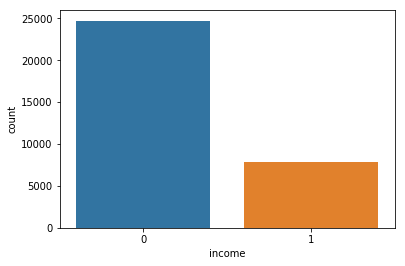

In [32]:
# Count of >50K & <=50K
sns.countplot(data['income'],label="Count")
plt.show()

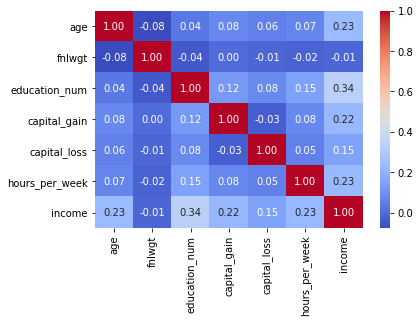

In [33]:
# Correlation matrix between numerical values
g = sns.heatmap(data[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

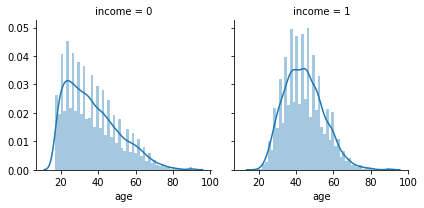

In [34]:
# Explore Age vs Income
g = sns.FacetGrid(data, col='income')
g = g.map(sns.distplot, "age")
plt.show()

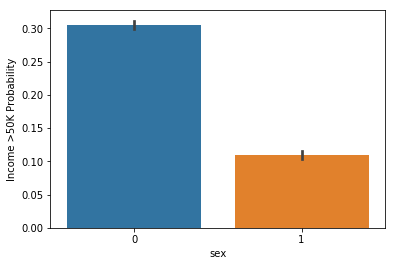

In [35]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=data)
g = g.set_ylabel("Income >50K Probability")
plt.show()

# Modeling data

In [36]:
# Split-out Validation Dataset and Create Test Variables
array = data.values
X = array[:,0:8]
Y = array[:,8]
print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y)
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=validation_size,random_state=seed)

# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))

# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: Accuracy is %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Split Data: X
[[    39  77516     13 ...   2174      0     40]
 [    50  83311     13 ...      0      0     13]
 [    38 215646      9 ...      0      0     40]
 ...
 [    58 151910      9 ...      0      0     40]
 [    22 201490      9 ...      0      0     20]
 [    52 287927      9 ...  15024      0     40]]
Split Data: Y
[0 0 0 ... 0 0 1]
LR: Accuracy is 0.798219 (0.008602)
LDA: Accuracy is 0.830121 (0.005715)
KNN: Accuracy is 0.775837 (0.011082)
DC: Accuracy is 0.807394 (0.007576)
NB: Accuracy is 0.794572 (0.009167)
RF: Accuracy is 0.838951 (0.005313)


## Comparing Algorithms

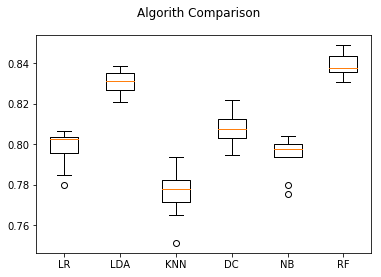

In [37]:
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can clearly see that Random Forest has highest accuracy of 84%

# Finalize Model

In [38]:
# Predictions on validation dataset - KNN

random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)

print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 84.1087056655919%
[[4526  425]
 [ 610  952]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4951
           1       0.69      0.61      0.65      1562

   micro avg       0.84      0.84      0.84      6513
   macro avg       0.79      0.76      0.77      6513
weighted avg       0.84      0.84      0.84      6513



In [39]:
# create a feature numerically representative of different capital gains catergories 
def cap_split(row):
    if row['capital_gain'] > 0 and row['income'] == 1:
        return 1
    elif row['capital_gain'] > 0 and row['income'] == 0:
        return 2
    elif row['capital_gain'] <= 0 and row['income'] == 1:
        return 3
    else:
        return 4
    
data['cap_split'] = data.apply (lambda row: cap_split (row), axis=1)

In [40]:
# def that will display the percentage and absolute value on the pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

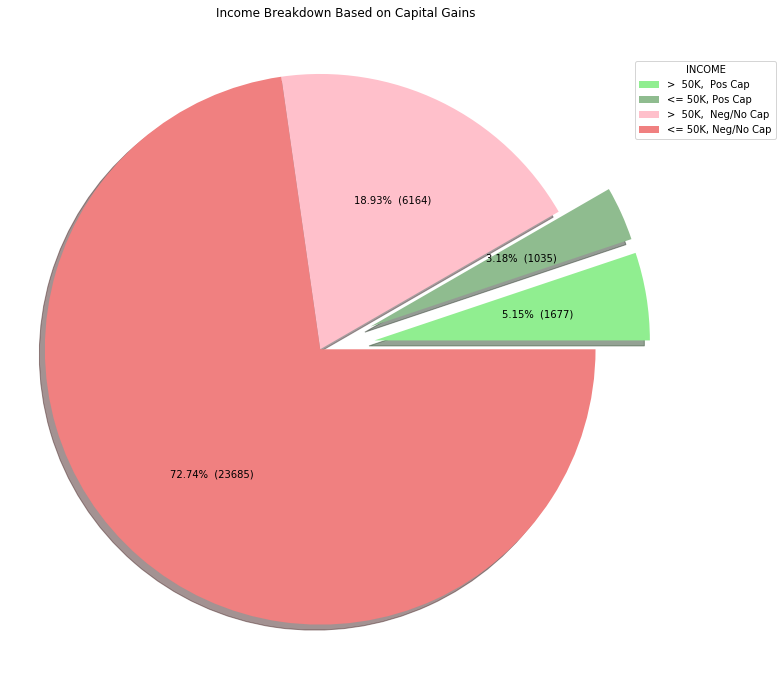

In [41]:
# pie chart displaying breakdown of all types of cap in relation to making over 50K
cap_split = data.cap_split.value_counts().sort_index()
colors = ['lightgreen', 'darkseagreen', 'pink', 'lightcoral']
explode = [0.2, 0.2, 0, 0]
label = ['>  50K,  Pos Cap', '<= 50K, Pos Cap', '>  50K,  Neg/No Cap', '<= 50K, Neg/No Cap']
fig = plt.figure(figsize=(12, 12)) 
ax = fig.add_subplot(1, 1, 1)
plt.pie(cap_split, shadow=True, colors=colors, explode=explode, autopct=make_autopct(cap_split))
plt.title('Income Breakdown Based on Capital Gains')
plt.axis('equal')
plt.legend(label, title='INCOME', bbox_to_anchor=(1.15, .95))

### Problem 1: Prediction task is to determine whether a person makes over 50K a year.
Hence we can predict that around 3.18% people earn salary over 50K.

### Problem 2: Which factors are important

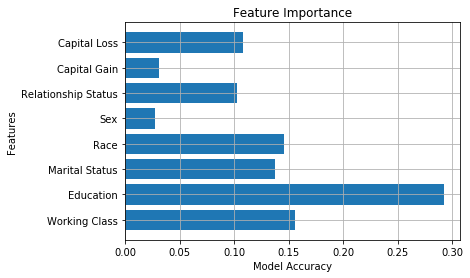

In [42]:
# fit an Extra Tree model to the data
extree = ExtraTreesClassifier()
extree.fit(X, Y)

# display the relative importance of each attribute
relval = extree.feature_importances_

# horizontal bar plot of feature importance

pos = np.arange(8) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, ('Working Class', 'Education', 'Marital Status', 'Race', 'Sex', 'Relationship Status', 'Capital Gain', 'Capital Loss'))
plt.grid(True)

Hence, we can see that Education, Working Class, Race and Marital status has huge impact on salary of a person.

### Problem 3: Which algorithms are best for this dataset
We have finalized Random Forest Classifier as it is showing best accuracy of 84.09%.